In [1]:
oldw <- getOption("warn")
options(warn = -1)

In [2]:
library(readxl)
library(lubridate)
library(Rmisc)
library(dplyr)
library(psych)
library(quantreg)
library(MuMIn)
library(jtools)
library(gridExtra)
library(ggplot2)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Loading required package: lattice

Loading required package: plyr


Attaching package: 'dplyr'


The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: SparseM


Attaching package: 'SparseM'


The following object is masked from 'package:base':

    backsolve



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha




# Import Data

In [3]:
vmm <- read_excel("C:/Users/rdeterman/Desktop/data10_14.xlsx", sheet = "data10_14", na = "NA")
vmm$dn  <- as.numeric(vmm$DATE)

In [4]:
dates <- read_excel("C:/Users/rdeterman/Desktop/data10_14.xlsx", sheet = "Date_Transform", na = "NA")

wea <- read_excel("C:/Users/rdeterman/Desktop/data10_14.xlsx", sheet = "BOS_wea", na = "NA")
wea<- wea[complete.cases(wea), ]
wea$dn <- as.numeric(wea$DateVal)

buoy <- read_excel("C:/Users/rdeterman/Desktop/data10_14.xlsx", sheet = "buoy", na = "NA")
#buoy<- buoy[complete.cases(buoy), ]
buoy_dailymean = aggregate(buoy["tempc"], by=buoy["date"], mean)
buoy_dailymean$dn  <- as.numeric(buoy_dailymean$date)

vmm_buoy <- read_excel("C:/Users/rdeterman/Desktop/data10_14.xlsx", sheet = "vmm_and_buoy")


New names:
* `` -> ...13



# Regression Results

In [5]:
res <- cor.test(vmm_buoy$CA,
                vmm_buoy$phy, 
                method = "pearson")
res


	Pearson's product-moment correlation

data:  vmm_buoy$CA and vmm_buoy$phy
t = 1.9934, df = 14, p-value = 0.06608
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.0332601  0.7833257
sample estimates:
      cor 
0.4701975 


In [6]:
eq= "phy ~ 1 + CA"
a = 0.995

mdl_ <-lm(eq,data=vmm_buoy)
confint(mdl_, level = a)
summary(mdl_)


,0.25 %,99.75 %
(Intercept),-1.0815327,2.1563042
CA,-0.0256376,0.1023585



Call:
lm(formula = eq, data = vmm_buoy)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2951 -0.5430 -0.3906  0.1357  3.1977 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.53739    0.48679   1.104   0.2882  
CA           0.03836    0.01924   1.993   0.0661 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.376 on 14 degrees of freedom
Multiple R-squared:  0.2211,	Adjusted R-squared:  0.1654 
F-statistic: 3.974 on 1 and 14 DF,  p-value: 0.06608


In [7]:
eq= "phy ~ -1 + CA"
a = 0.995

mdl_ <-lm(eq,data=vmm_buoy)
confint(mdl_, level = a)
summary(mdl_)


,0.25 %,99.75 %
CA,0.00836103,0.09841167



Call:
lm(formula = eq, data = vmm_buoy)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5481 -0.1318  0.0756  0.4609  3.4316 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)   
CA  0.05339    0.01370   3.896  0.00143 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.386 on 15 degrees of freedom
Multiple R-squared:  0.503,	Adjusted R-squared:  0.4699 
F-statistic: 15.18 on 1 and 15 DF,  p-value: 0.001432


In [8]:
eq= "phy ~ 1 + dt"
a = 0.995

#x = buoy$dt,
#y = buoy$phy,


mdl_0 <-lm(eq,data=buoy)
confint(mdl_0, level = a)
summary(mdl_0)


,0.25 %,99.75 %
(Intercept),9.661557e+00,1.028730e+01
dt,-6.068451e-09,-5.651661e-09



Call:
lm(formula = eq, data = buoy)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5375 -0.6919 -0.2015  0.3968 28.1283 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.974e+00  1.115e-01   89.49   <2e-16 ***
dt          -5.860e-09  7.424e-11  -78.94   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9399 on 74996 degrees of freedom
  (723 observations deleted due to missingness)
Multiple R-squared:  0.07671,	Adjusted R-squared:  0.0767 
F-statistic:  6231 on 1 and 74996 DF,  p-value: < 2.2e-16


# Total Phosphorus and Chlorophyll-*a* Concentrations Over Time
Data Source:  https://www.crwa.org/monitor.html  

In [9]:
#setting the date as a number and centering it around zero
count <- seq.int(1,955)
for (b in count) {               
        target_date <- vmm$DATE[b]
        target_row   <- match(target_date,dates$date) 
        vmm$cd[b] <- dates$subtractedfrommean[target_row]
}

## Chl-*a* 

In [10]:
eq= "CA ~ 1 + cd"
a = 0.995
mdl <-lm(eq,data=vmm)
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),7.096086230,9.474814e+00
cd,-0.001096042,-9.816826e-05



Call:
lm(formula = eq, data = vmm)

Residuals:
    Min      1Q  Median      3Q     Max 
 -9.637  -6.448  -4.625   0.629 115.554 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.2854500  0.4227216  19.600  < 2e-16 ***
cd          -0.0005971  0.0001773  -3.367  0.00079 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.06 on 953 degrees of freedom
Multiple R-squared:  0.01176,	Adjusted R-squared:  0.01072 
F-statistic: 11.34 on 1 and 953 DF,  p-value: 0.0007898


In [11]:
lgc = (vmm$basin1 == 1)
mdl <-lm(eq,data=vmm[lgc,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),9.737739312,17.725334026
cd,-0.002768669,0.000569407



Call:
lm(formula = eq, data = vmm[lgc, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-15.447 -10.371  -5.942   2.832 109.972 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.7315367  1.4020257   9.794   <2e-16 ***
cd          -0.0010996  0.0005859  -1.877   0.0625 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.39 on 152 degrees of freedom
Multiple R-squared:  0.02265,	Adjusted R-squared:  0.01622 
F-statistic: 3.522 on 1 and 152 DF,  p-value: 0.06247


In [12]:
mdl <-lm(eq,data=vmm[!lgc,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),6.0696205884,8.4142714592
cd,-0.0009981072,-0.0000138057



Call:
lm(formula = eq, data = vmm[!lgc, ])

Residuals:
    Min      1Q  Median      3Q     Max 
 -8.227  -5.580  -3.972   0.314 111.546 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.2419460  0.4164784  17.389  < 2e-16 ***
cd          -0.0005060  0.0001748  -2.894  0.00391 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.78 on 799 degrees of freedom
Multiple R-squared:  0.01037,	Adjusted R-squared:  0.009134 
F-statistic: 8.374 on 1 and 799 DF,  p-value: 0.00391


# CA vs TP

In [13]:
#All
eq= "CA ~ 1 + TP"
a = 0.995
mdl <-lm(eq,data=vmm)
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),-0.9294381,4.391732
TP,63.5874460,136.684836



Call:
lm(formula = eq, data = vmm)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.830  -5.895  -3.726   1.164 109.242 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.7311     0.9455   1.831   0.0674 .  
TP          100.1361    12.9884   7.710 3.33e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.87 on 902 degrees of freedom
  (51 observations deleted due to missingness)
Multiple R-squared:  0.06182,	Adjusted R-squared:  0.06078 
F-statistic: 59.44 on 1 and 902 DF,  p-value: 3.327e-14


In [14]:
mdl <-lm(eq,data=vmm[vmm$basin1 ==0,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),-0.9132556,4.064838
TP,52.1319249,120.805072



Call:
lm(formula = eq, data = vmm[vmm$basin1 == 0, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-25.430  -5.059  -3.126   0.413 106.410 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.5758     0.8841   1.782   0.0751 .  
TP           86.4685    12.1963   7.090 3.09e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.52 on 754 degrees of freedom
  (45 observations deleted due to missingness)
Multiple R-squared:  0.0625,	Adjusted R-squared:  0.06125 
F-statistic: 50.26 on 1 and 754 DF,  p-value: 3.095e-12


In [15]:
mdl <-lm(eq,data=vmm[vmm$basin1 ==1,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),-11.66948,13.69806
TP,14.20559,355.44785



Call:
lm(formula = eq, data = vmm[vmm$basin1 == 1, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-24.463 -10.113  -4.842   4.751  98.941 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    1.014      4.450   0.228  0.82002   
TP           184.827     59.860   3.088  0.00242 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.27 on 146 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.0613,	Adjusted R-squared:  0.05487 
F-statistic: 9.533 on 1 and 146 DF,  p-value: 0.002415


In [16]:
eq= "CA ~ -1 + TP"
a = 0.995
mdl <-lm(eq,data=vmm)
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
TP,104.779,137.9051



Call:
lm(formula = eq, data = vmm)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.652  -5.530  -3.035   1.618 108.215 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
TP  121.342      5.886   20.61   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.88 on 903 degrees of freedom
  (51 observations deleted due to missingness)
Multiple R-squared:   0.32,	Adjusted R-squared:  0.3193 
F-statistic:   425 on 1 and 903 DF,  p-value: < 2.2e-16


In [17]:
mdl <-lm(eq,data=vmm[vmm$basin1 ==0,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
TP,89.31032,121.9085



Call:
lm(formula = eq, data = vmm[vmm$basin1 == 0, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-30.048  -4.658  -2.481   1.110 105.770 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
TP  105.609      5.789   18.24   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.54 on 755 degrees of freedom
  (45 observations deleted due to missingness)
Multiple R-squared:  0.3059,	Adjusted R-squared:  0.305 
F-statistic: 332.8 on 1 and 755 DF,  p-value: < 2.2e-16


In [18]:
mdl <-lm(eq,data=vmm[vmm$basin1 ==1,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
TP,143.4961,252.0191



Call:
lm(formula = eq, data = vmm[vmm$basin1 == 1, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-25.179  -9.946  -4.597   5.075  98.274 

Coefficients:
   Estimate Std. Error t value Pr(>|t|)    
TP   197.76      19.04   10.39   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.22 on 147 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.4233,	Adjusted R-squared:  0.4194 
F-statistic: 107.9 on 1 and 147 DF,  p-value: < 2.2e-16


# CA vs TN

In [19]:
eq= "CA ~ 1 + TN"
mdl <-lm(eq,data=vmm)
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),7.193496,11.332034
TN,-1.785504,0.558278



Call:
lm(formula = eq, data = vmm)

Residuals:
    Min      1Q  Median      3Q     Max 
 -8.431  -6.830  -4.905   1.035 115.674 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.2628     0.7354  12.596   <2e-16 ***
TN           -0.6136     0.4165  -1.473    0.141    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.37 on 903 degrees of freedom
  (50 observations deleted due to missingness)
Multiple R-squared:  0.002398,	Adjusted R-squared:  0.001294 
F-statistic: 2.171 on 1 and 903 DF,  p-value: 0.141


In [20]:
mdl <-lm(eq,data=vmm[vmm$basin1 == 0,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),5.65551,9.6139676
TN,-1.31005,0.8239196



Call:
lm(formula = eq, data = vmm[vmm$basin1 == 0, ])

Residuals:
    Min      1Q  Median      3Q     Max 
 -7.087  -5.731  -4.358   0.114 110.886 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.6347     0.7030  10.860   <2e-16 ***
TN           -0.2431     0.3790  -0.641    0.521    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.05 on 757 degrees of freedom
  (42 observations deleted due to missingness)
Multiple R-squared:  0.0005431,	Adjusted R-squared:  -0.0007772 
F-statistic: 0.4113 on 1 and 757 DF,  p-value: 0.5215


In [21]:
mdl <-lm(eq,data=vmm[vmm$basin1 == 1,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),11.65070,47.887902
TN,-28.42927,1.784263



Call:
lm(formula = eq, data = vmm[vmm$basin1 == 1, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-15.695 -10.681  -5.703   3.772 114.571 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   29.769      6.355   4.684 6.44e-06 ***
TN           -13.323      5.299  -2.514    0.013 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.51 on 144 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.04205,	Adjusted R-squared:  0.0354 
F-statistic: 6.321 on 1 and 144 DF,  p-value: 0.01303


# TN:TP vs CA

In [22]:
mdl <-lm("CA ~ 1 + ratio",data=vmm)
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),8.7388539,12.27478032
ratio,-0.1299535,-0.03546017



Call:
lm(formula = "CA ~ 1 + ratio", data = vmm)

Residuals:
    Min      1Q  Median      3Q     Max 
 -8.870  -6.956  -4.715   1.145 114.464 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.50682    0.62825  16.724   <2e-16 ***
ratio       -0.08271    0.01679  -4.926    1e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.2 on 885 degrees of freedom
  (68 observations deleted due to missingness)
Multiple R-squared:  0.02669,	Adjusted R-squared:  0.02559 
F-statistic: 24.27 on 1 and 885 DF,  p-value: 1.001e-06


In [23]:
mdl <-lm("CA ~ 1 + ratio",data=vmm[vmm$basin1 == 0,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),7.1353482,10.57662858
ratio,-0.1041923,-0.01798058



Call:
lm(formula = "CA ~ 1 + ratio", data = vmm[vmm$basin1 == 0, ])

Residuals:
    Min      1Q  Median      3Q     Max 
 -7.521  -5.903  -4.083   0.509 110.273 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.85599    0.61114   14.49  < 2e-16 ***
ratio       -0.06109    0.01531   -3.99 7.27e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.85 on 741 degrees of freedom
  (58 observations deleted due to missingness)
Multiple R-squared:  0.02103,	Adjusted R-squared:  0.01971 
F-statistic: 15.92 on 1 and 741 DF,  p-value: 7.268e-05


In [24]:
mdl <-lm("CA ~ 1 + ratio",data=vmm[vmm$basin1 == 1,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),17.945858,39.420122
ratio,-1.303529,-0.235088



Call:
lm(formula = "CA ~ 1 + ratio", data = vmm[vmm$basin1 == 1, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-19.170 -10.766  -4.624   6.403 104.346 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.6830     3.7654   7.618 3.32e-12 ***
ratio        -0.7693     0.1873  -4.106 6.75e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.99 on 142 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.1061,	Adjusted R-squared:  0.09985 
F-statistic: 16.86 on 1 and 142 DF,  p-value: 6.753e-05


# TN:TP vs time

In [25]:
mdl <-lm("ratio ~ 1 + cy",data=vmm)
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),24.3891278,29.310467
cy,0.3795008,1.154706



Call:
lm(formula = "ratio ~ 1 + cy", data = vmm)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.246 -12.084  -5.727   2.402 292.918 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26.8498     0.8744  30.706  < 2e-16 ***
cy            0.7671     0.1377   5.569 3.39e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 25.98 on 885 degrees of freedom
  (68 observations deleted due to missingness)
Multiple R-squared:  0.03386,	Adjusted R-squared:  0.03277 
F-statistic: 31.02 on 1 and 885 DF,  p-value: 3.392e-08


In [26]:
mdl <-lm("ratio ~ 1 + cy",data=vmm[vmm$basin1 == 0,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),25.531974,31.314403
cy,0.396944,1.308798



Call:
lm(formula = "ratio ~ 1 + cy", data = vmm[vmm$basin1 == 0, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-28.517 -13.531  -6.448   2.287 290.647 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.4232     1.0269  27.679  < 2e-16 ***
cy            0.8529     0.1619   5.267 1.82e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27.92 on 741 degrees of freedom
  (58 observations deleted due to missingness)
Multiple R-squared:  0.03608,	Adjusted R-squared:  0.03478 
F-statistic: 27.74 on 1 and 741 DF,  p-value: 1.822e-07


In [27]:
mdl <-lm("ratio ~ 1 + cy",data=vmm[vmm$basin1 == 1,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),17.02228539,20.494019
cy,0.06814101,0.611907



Call:
lm(formula = "ratio ~ 1 + cy", data = vmm[vmm$basin1 == 1, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-14.140  -5.805  -1.212   4.286  21.919 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.75815    0.60874  30.815  < 2e-16 ***
cy           0.34002    0.09535   3.566 0.000494 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.291 on 142 degrees of freedom
  (10 observations deleted due to missingness)
Multiple R-squared:  0.0822,	Adjusted R-squared:  0.07574 
F-statistic: 12.72 on 1 and 142 DF,  p-value: 0.0004941


# Total Phosphorus

In [28]:
eq= "TP ~ 1 + cd"
mdl <-lm(eq,data=vmm)
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),6.164455e-02,6.756305e-02
cd,-5.324798e-06,-2.782917e-06



Call:
lm(formula = eq, data = vmm)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058740 -0.020753 -0.004388  0.015457  0.275692 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.460e-02  1.052e-03  61.432   <2e-16 ***
cd          -4.054e-06  4.517e-07  -8.976   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0316 on 902 degrees of freedom
  (51 observations deleted due to missingness)
Multiple R-squared:  0.08199,	Adjusted R-squared:  0.08097 
F-statistic: 80.56 on 1 and 902 DF,  p-value: < 2.2e-16


In [29]:
lgc = (vmm$basin1 == 1)
mdl <-lm(eq,data=vmm[lgc,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),6.495091e-02,7.564937e-02
cd,-5.253877e-06,-6.948193e-07



Call:
lm(formula = eq, data = vmm[lgc, ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.037728 -0.017738 -0.003262  0.015495  0.065413 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.030e-02  1.877e-03  37.459  < 2e-16 ***
cd          -2.974e-06  7.997e-07  -3.719 0.000284 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02283 on 146 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.08654,	Adjusted R-squared:  0.08028 
F-statistic: 13.83 on 1 and 146 DF,  p-value: 0.0002844


In [30]:
mdl <-lm(eq,data=vmm[!lgc,])
confint(mdl, level = a)
summary(mdl)

,0.25 %,99.75 %
(Intercept),6.010695e-02,6.685602e-02
cd,-5.726992e-06,-2.823920e-06



Call:
lm(formula = eq, data = vmm[!lgc, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.05843 -0.02064 -0.00574  0.01533  0.27594 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.348e-02  1.199e-03  52.962  < 2e-16 ***
cd          -4.275e-06  5.156e-07  -8.292 5.08e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03294 on 754 degrees of freedom
  (45 observations deleted due to missingness)
Multiple R-squared:  0.08358,	Adjusted R-squared:  0.08236 
F-statistic: 68.76 on 1 and 754 DF,  p-value: 5.083e-16


# Limiting Nutrient and Summaries


In [31]:
vmm$month <- as.double(format(vmm$DATE, "%m"))
vmm$Year <- as.double(format(vmm$DATE, "%Y"))
#APRIL to October
lgc <- (vmm$month >= 4 & vmm$month <=10)
apr_oct <- vmm[lgc,]
CI(apr_oct$CA, ci=0.995)[1]

upper 
13.60889

In [32]:
res<- apr_oct %>%
    group_by(Year,basin1) %>%
    summarise(mean_CA = mean(CA))# %>% CI(CA, ci=0.995)) 
    #print(n = Inf)

nb <- res[res$basin1 == 0,]
x1 <- nb$Year - 0.33
x2 <- nb$Year + 0.33
y1 <- nb$basin1
y2 <- nb$basin1 +0.45
fill<- c(factor(nb$mean_CA >= 10))
fill<- unlist(fill)
c <- factor(fill, labels = c('pass', 'fail') )
r<- unlist(round(nb$mean_CA, digits =1))
nb_ci <- c("(11)","(13)","(12)","(6.2)","(3.7)","(11)","(5.1)","(25)","(11)","(3.5)","(7.0)","(1.9)","(3.6)","(7.9)","(2.2)","(20)","(2.4)","(9.4)","(7.6)","(17)","(1.1)","(3.9)","(2.9)")



b <- res[res$basin1 == 1,]
x3 <- b$Year - 0.33
x4 <- b$Year + 0.33
y3 <- b$basin1 - 0.45
y4 <- b$basin1 

fill2<- c(factor(b$mean_CA >= 10))
fill2<- unlist(fill2)
c2 <- factor(fill2, labels = c('pass', 'fail') )
r2<- unlist(round(b$mean_CA, digits =1))
b_ci <-c("(40)","(67)","(44)","(54)","(46)","(85)","(86)","(600)","(410)","(14)","(540)","(9.2)","(18)","(17)","(22)","(47)","(15)","(69)","(55)","(92)","(11)","(22)","(84)")


d=data.frame(x1=c(x1), x2=c(x2), y1=c(nb$basin1), y2=c(nb$basin1+0.5), r=r)
d2=data.frame(x3=c(x3), x4=c(x4), y1=c(b$basin1), y2=c(b$basin1+0.5), r=r2)

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
fig(50,15)
summ<-ggplot() + 
scale_x_continuous(name="x") + 
scale_y_continuous(name="y") +
geom_rect(data=nb, mapping=aes(xmin=x1, xmax=x2, ymin=y1, ymax=y2, fill = c))+
scale_fill_manual(values=c("pass" = "#A0A0A0", "fail" = "#d24649")) + 
geom_text(data=nb, aes(x=x1+(x2-x1)/2, y=(y2+y1)/2, label=r), size=12)+
geom_text(data=nb, aes(x=x1+(x2-x1)/2, y=(y2+y1)/2 - 0.05, label=nb_ci), size=10)+

geom_rect(data=b, mapping=aes(xmin=x3, xmax=x4, ymin=y3, ymax=y4, fill = c2))+
scale_fill_manual(values=c("pass" = "#A0A0A0", "fail" = "#d24649")) + 
geom_text(data=b, aes(x=x3+(x4-x3)/2, y=(y4+y3)/2, label=r2), size=12)+
geom_text(data=nb, aes(x=x3+(x4-x3)/2, y=(y4+y3)/2 - 0.05, label=b_ci), size=10)+

geom_text(data=d, aes(x=x3+(x4-x3)/2, y=(y4+y1)/2, label=nb$Year), size=12) +
geom_text(aes(x=c(1996,1996), y=c(0.75, 0.25), label=c('Basin', 'Not Basin')), size=12)

ggsave("jan8_summary.eps", plot = summ, width = 40.45,
  height = 25,
  units = "in")

`summarise()` regrouping output by 'Year' (override with `.groups` argument)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



In [33]:
vmm_edit <- vmm[complete.cases(vmm$TP), ]
vmm_edit %>%
    group_by(Year) %>%
    summarise(mean_TP = mean(TP, na.rm = TRUE))
              #CI(TP, ci=0.995)) %>%

`summarise()` ungrouping output (override with `.groups` argument)



Year,mean_TP
<dbl>,<dbl>
1997,0.09277213
1998,0.07358245
1999,0.07843917
2000,0.08304775
2001,0.08252811
2002,0.07420688
2003,0.06222927
2004,0.07185334
2005,0.06479807


In [34]:
vmm$ratio <- vmm$TN / vmm$TP
mean(vmm$ratio, na.rm = TRUE)

[1] 26.51679

In [116]:
fns <- function(series) {
    print(summary(series[vmm$basin1 == 0]))
    print(length(series[vmm$basin1 == 0])-summary(series[vmm$basin1 == 0])[7][1])
    print(summary(series[vmm$basin1 == 1]))
    print(length(series[vmm$basin1 == 1])-summary(series[vmm$basin1 == 1])[7][1])
}


In [117]:
fns(vmm$TP)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.01239 0.04086 0.05751 0.06383 0.07891 0.35620      45 
NA's 
 756 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.02920 0.05135 0.06954 0.07045 0.08650 0.13385       6 
NA's 
 148 


In [118]:
fns(vmm$TN)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.1031  0.9203  1.1206  1.4526  1.4944  9.6448      42 
NA's 
 759 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.3322  0.9765  1.1267  1.1678  1.3500  2.0200       8 
NA's 
 146 


In [119]:
fns(vmm$OP)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00051 0.01048 0.01741 0.02068 0.02784 0.09940      38 
NA's 
 763 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00070 0.01145 0.02033 0.02187 0.03110 0.06839       6 
NA's 
 148 


In [120]:
fns(vmm$NN)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00158 0.37400 0.63452 0.87477 0.95668 8.09404      28 
NA's 
 773 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00035 0.35130 0.56008 0.53862 0.74484 1.32000       4 
NA's 
 150 


Saving 6.67 x 6.67 in image



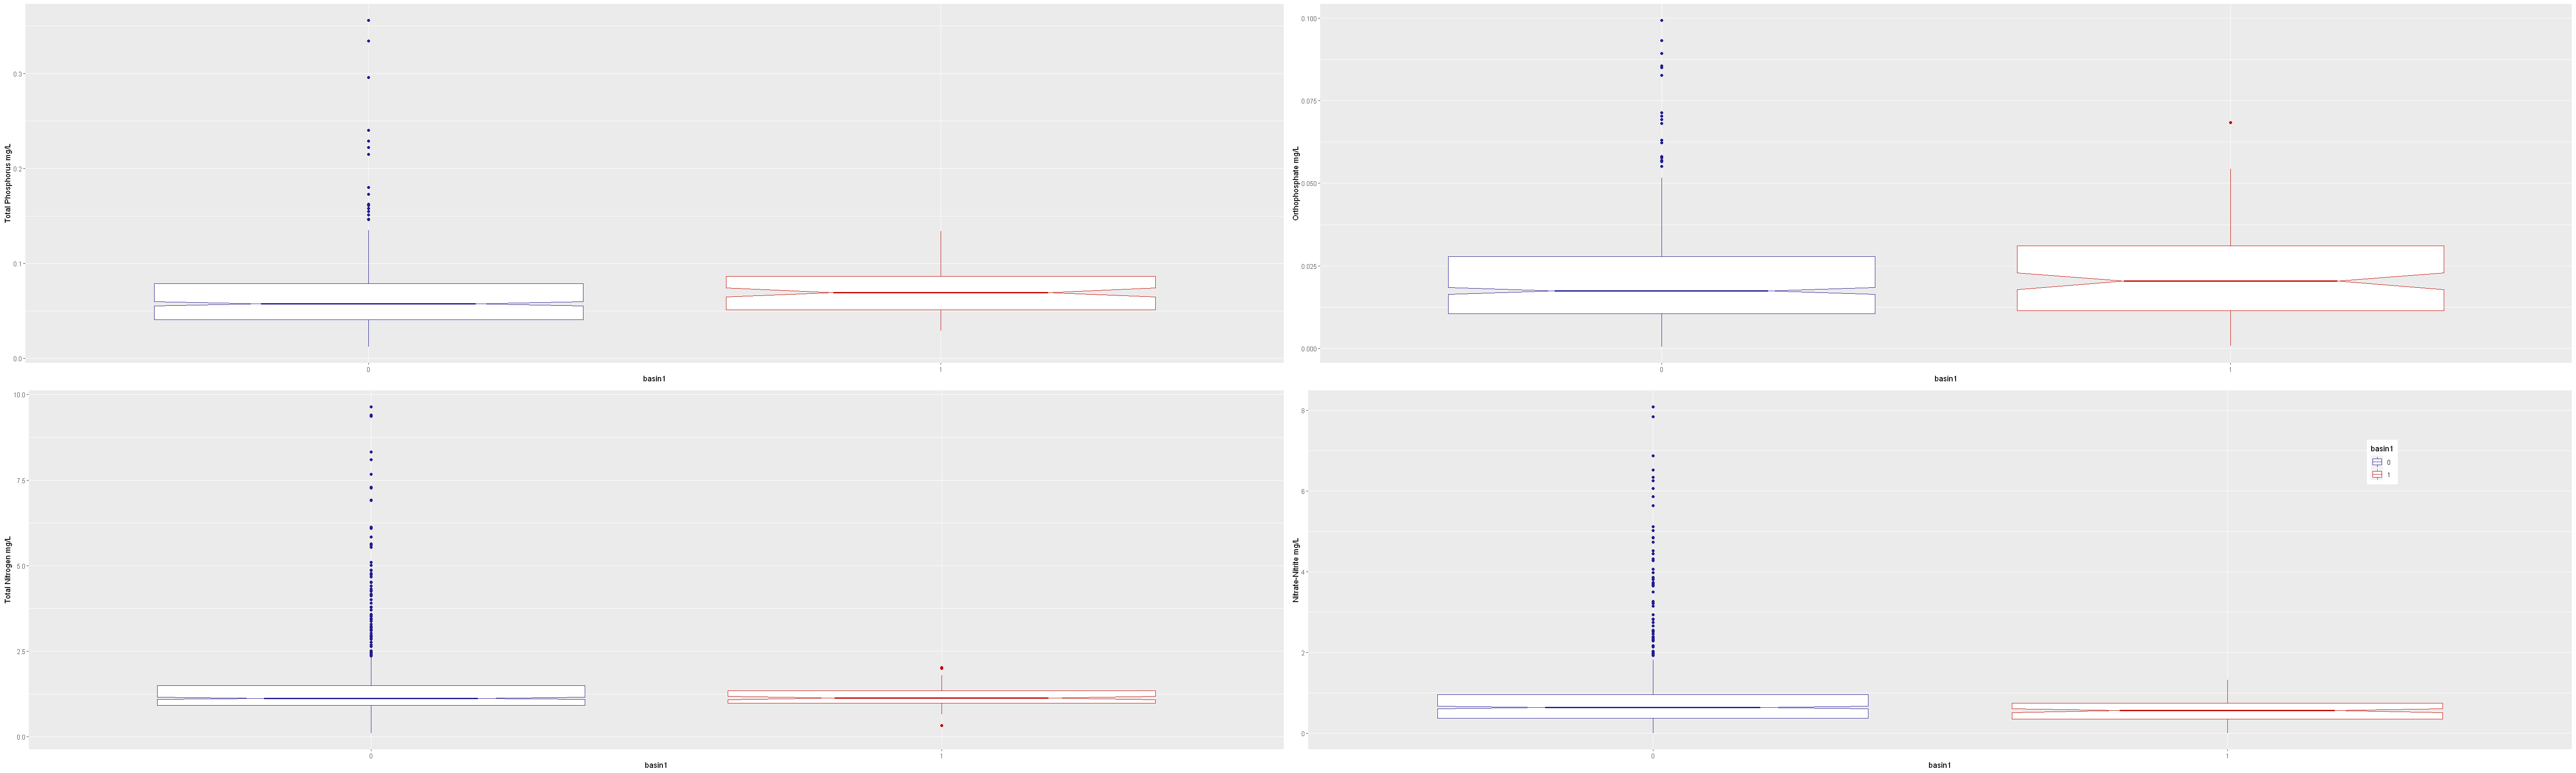

In [39]:
vmm$basin1 <- as.factor(vmm$basin1)
p1<- ggplot(vmm, aes(x=basin1, y=TP,color=basin1)) + 
  geom_boxplot(notch = TRUE) + ylab('Total Phosphorus mg/L') +
  scale_color_manual(values=c("#211c91", "#c30700")) +
  theme(legend.position = "none")
p2<- ggplot(vmm, aes(x=basin1, y=OP,color=basin1)) + 
  geom_boxplot(notch = TRUE)+ ylab('Orthophosphate mg/L')+
  scale_color_manual(values=c("#211c91", "#c30700")) +
  theme(legend.position = "none")
p3<- ggplot(vmm, aes(x=basin1, y=TN,color=basin1)) + 
  geom_boxplot(notch = TRUE)+ ylab('Total Nitrogen mg/L') + 
  scale_color_manual(values=c("#211c91", "#c30700")) +
  theme(legend.position = "none")
p4<- ggplot(vmm, aes(x=basin1, y=NN,color=basin1)) + 
  geom_boxplot(notch = TRUE) + ylab('Nitrate-Nitrite mg/L') +
  scale_color_manual(values=c("#211c91", "#c30700")) +
  theme(legend.position = c(0.85, .8))

p5<- grid.arrange(p1, p2, p3,p4, nrow = 2)
ggsave("jan7_box.eps", plot = p5)

# Multiple Regression
Average daily air temperature: https://climexp.knmi.nl/data/vgdcnUSW00014739.dat  
Daily precipitation: https://climexp.knmi.nl/data/pgdcnUSW00014739.dat  

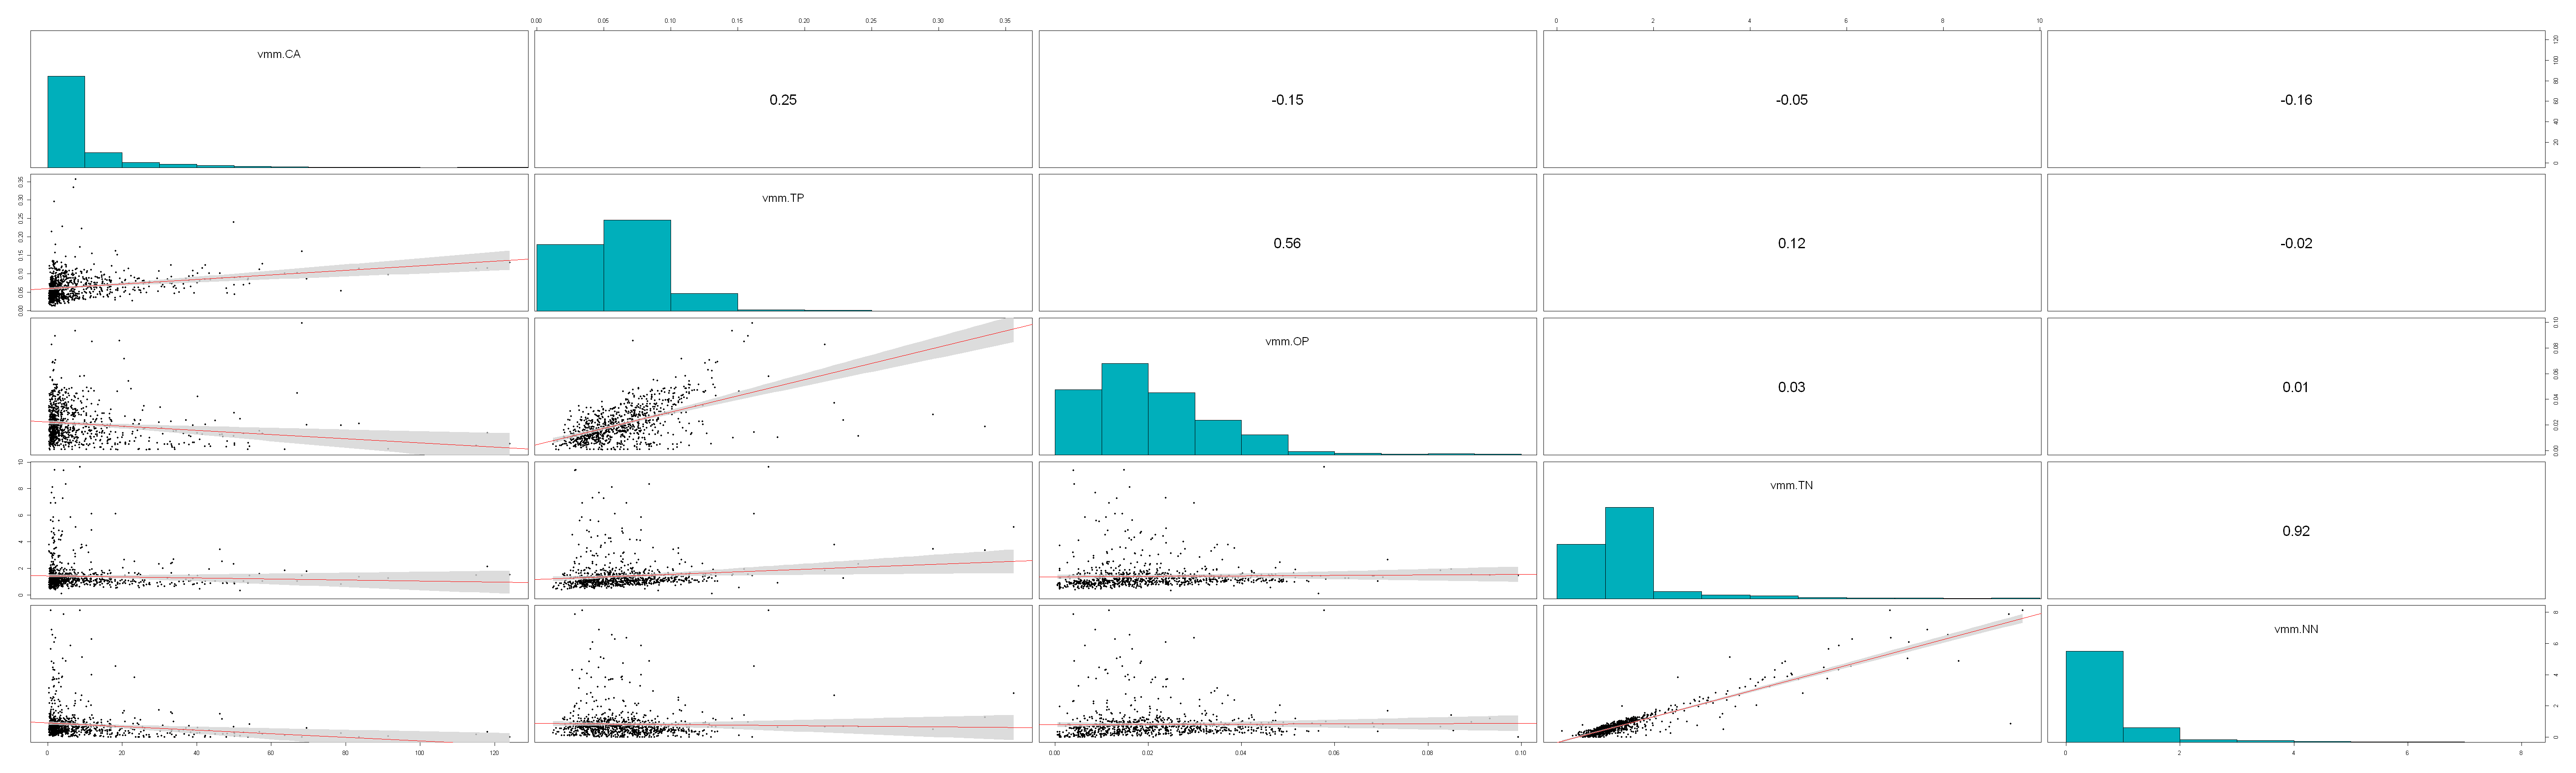

In [40]:
pairs.panels(data.frame(vmm$CA, vmm$TP, vmm$OP, vmm$TN, vmm$NN), 
             method = "pearson",
             hist.col = "#00AFBB",
             density = FALSE, 
             smooth = FALSE, 
             ellipses = FALSE,
             rug = FALSE,
             lm = TRUE,
             ci = TRUE, 
             alpha = 0.005
             )


In [41]:
#take the sample collection dates and sample values.
# for each date range find the average of the comparison quantity (precip, temp)
#target dates = sample collection dates
#long dates = dates of the comparison thing -- precip/ temp
#long data to match -- the comparison precip/ temp values
#corr comparer - value of the sample collected

range_means <- function(target_dates, long_dates, long_data_to_match, corr_comparer) {
    #length of samples array
    b_count <- seq(1,length(target_dates))
    
    #dayrange to compare over
    range <- seq(1,90)  
    
    #empty dataframe to store the range means 
    #length = number of samples
    #columns = 90; there are 90 range comparisons 1,2,3,4,5,6...,88,89,89
    means <- data.frame(matrix(NA, nrow = length(target_dates), ncol =90))
    
    #for each value in the sample array
    for (b in b_count) { 
        #what is the date of the sample?
        target_date <- target_dates[b] 
        
        #where is the matching date on the comparison array?
        wea_row <- match(target_date,long_dates) 
        
        #for each day range; compare that many days back and find the mean
        #store the mean in the means dataframe
        for (r in range){
            rows <- seq.int(from = wea_row-r,to = wea_row) 
            val <-  mean(long_data_to_match[rows])
            means[b,r]<- val
             }   
        }
    
    corr = vector()
    for (r in range){
        corr[r] = abs(cor(corr_comparer, pull(means, r),use = "complete.obs"))
        }
    #print(corr)
    target_col = which(corr==max(corr))
    #print(target_col)
    
    return(means[,target_col])   
}

### In what day range is average precipitation most strongly correlated with chl-*a*?

In [42]:
vmm$prcp73 <- range_means(vmm$DATE,wea$DateVal,wea$PRCPmm, vmm$CA)

### In what range is air temperature most strongly correlated with chl-*a*?

In [43]:
vmm$tave57 <- range_means(vmm$DATE,wea$DateVal,wea$TAVEC_center, vmm$CA)

## Using daily air temperature and known water temperature to predict unknown water temperatures

Data sources:   
Daily average air temperature: https://climexp.knmi.nl/data/vgdcnUSW00014739.dat  
Water temperature: https://www.epa.gov/charlesriver/live-water-quality-data-lower-charles-river#LiveDataStream

In [44]:
at7 <- range_means(buoy_dailymean$date,wea$DateVal,wea$TAVEC, buoy_dailymean$tempc)
buoy_dailymean$airtemp_7day <- at7
linearMod <- lm(tempc ~ airtemp_7day, data=buoy_dailymean) 

In [45]:
vmm$airtemp_7day <- NA
b_count <- seq(1,955)
r = 7 

for (b in b_count) { 
    target_date <- vmm$DATE[b] 
    wea_row <- match(target_date,wea$DateVal) 
    rows <- seq.int(from = wea_row-r,to = wea_row) 
    val <-  mean(wea$TAVEC[rows])
    vmm$airtemp_7day[b]<- val
    }   

vmm$pred_watertemp<- predict(linearMod, vmm)
vmm$pred_watertemp_center <- vmm$pred_watertemp−mean(vmm$pred_watertemp)

## Formulas

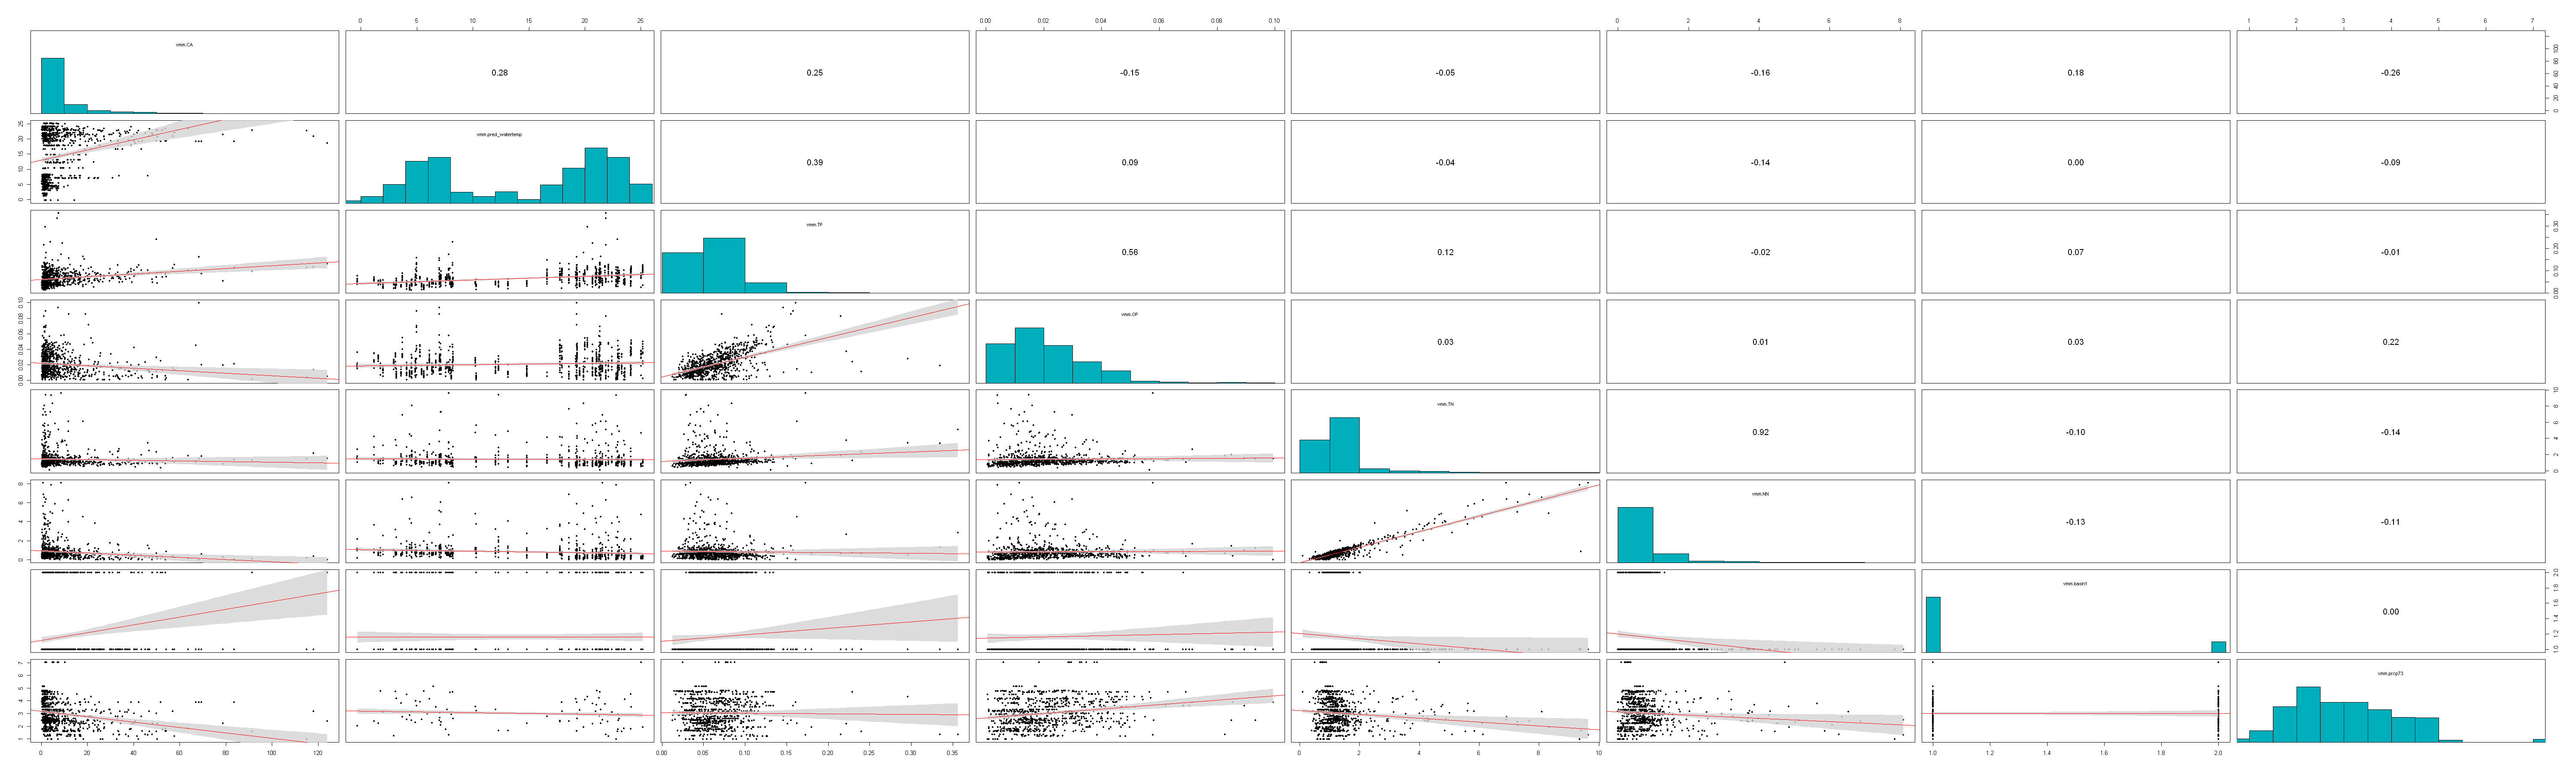

In [46]:
pairs.panels(data.frame(vmm$CA, vmm$pred_watertemp, vmm$TP, vmm$OP,vmm$TN,vmm$NN, vmm$basin1, vmm$prcp73), 
             method = "pearson",
             hist.col = "#00AFBB",
             density = FALSE, 
             smooth = FALSE, 
             ellipses = FALSE,
             rug = FALSE,
             lm = TRUE,
             ci = TRUE, 
             alpha = 0.005
             )

In [47]:
formulas <- c('CA ~ -1 + pred_watertemp', 
              'CA ~ -1 + TP',
              'CA ~ -1 + basin1', 
              'CA ~ -1 + prcp73',
              'CA ~ -1 + pred_watertemp + TP', 
              'CA ~ -1 + pred_watertemp + basin1', 
              'CA ~ -1 + pred_watertemp+ prcp73',
              'CA ~ -1 + TP + basin1', 
              'CA ~ -1 + TP + prcp73',
              'CA ~ -1 + basin1 + prcp73',
              'CA ~ -1 + pred_watertemp + TP + basin1', 
              'CA ~ -1 + pred_watertemp + TP + prcp73', 
              'CA ~ -1 + prcp73 + TP + basin1', 
              'CA ~ -1 + prcp73 + pred_watertemp + basin1', 
              'CA ~ -1 + pred_watertemp + TP + basin1 + prcp73',
             
              'CA ~ 1 + pred_watertemp', 
              'CA ~ 1 + TP',
              'CA ~ 1 + basin1', 
              'CA ~ 1 + prcp73',
              'CA ~ 1 + pred_watertemp + TP', 
              'CA ~ 1 + pred_watertemp + basin1', 
              'CA ~ 1 + pred_watertemp + prcp73',
              'CA ~ 1 + TP + basin1', 
              'CA ~ 1 + TP + prcp73',
              'CA ~ 1 + basin1 + prcp73',
              'CA ~ 1 + pred_watertemp + TP + basin1', 
              'CA ~ 1 + pred_watertemp + TP + prcp73', 
              'CA ~ 1 + prcp73 + TP+ basin1', 
              'CA ~ 1 + prcp73 + pred_watertemp + basin1', 
              'CA ~ 1 + pred_watertemp + TP + basin1 + prcp73'
              
            )
             

In [48]:
myfunction <- function(tau){
    i = 1;
    ac<- c();
    for (f in formulas){
     mdl <- rq(f, tau = tau, alpha = 0.005, data = vmm)
     ac[i] <- AICc(mdl)
     i=i+1;
    }
    i_aicc = match(min(ac),ac)
    print(ac)
    if (ac[30]<= ac[i_aicc]+2) {
        return(formulas[30])
     } else {
        return(formulas[i_aicc])
       }
}

In [49]:
myplots <- function(x){
     data = vmm_model
     #x = quantile
     res <- c('')
     df <- data.frame(x, res, stringsAsFactors=FALSE)
         
     #find the best variables
     df[1,2] <-myfunction(x) 
     print(df[1,2])
     
     # make the model with the best variables and the quantile selected
     mdl <- rq(df[1,2], tau = x, alpha = 0.005, data = data)
     #https://jtools.jacob-long.com/reference/summ.rq.html
     s<- summ(mdl, confint= TRUE, ci.width = 0.995,digits = 6)
     print(s)
    
     #find data that fall within +/- 0.03 of the quantile
     minval = quantile(data$CA, probs = c(x-0.03))
     maxval = quantile(data$CA, probs = c(x+0.03))
     lgc = (data$CA>=minval) & (data$CA<=maxval)
   
     df1 = data[lgc,]
    
     pred<- predict(mdl, df1, type = "confidence", interval = "confidence", level = .995) 
     pred <- cbind(pred, c(seq(1,dim(pred)[1])))  
     pred<-cbind(pred, df1$CA)
   
     colnames(pred, do.NULL = TRUE, prefix = "col")
     colnames(pred) <- c('fit', 'lower', 'higher', 'index', 'measured')
     pred <- as.data.frame(pred)
     lgc<- (pred$measured>= pred$lower) & (pred$measured<= pred$higher)
     
     #print(pred)
    
     pred_ok <- pred[lgc,]
     print('Proportion of Values in Predicted Range')
     print(nrow(pred_ok)/nrow(pred))
    
     plot<- ggplot() +
      geom_point(data=pred, aes(x=index, y=measured), color='black') + 
      geom_point(data=pred_ok, aes(x=index, y=measured), color='black') +
      geom_linerange(data = pred, aes(x= index, y= fit, ymin = lower, ymax = higher), color = 'red') +
      geom_linerange(data = pred_ok, aes(x= index, y= fit, ymin = lower, ymax = higher), color = 'black') +
      ggtitle(x , "+/- 0.03") + 
      theme_classic()
      
     ### Plot with dates as hover text 
     #fig4 <- plot_ly(type = 'scatter', mode = 'markers',width = 750, height = 750)
     #plot_1 <- fig4 %>%
     #   add_trace(
     #       x = pred$index,
     #       y = pred$measured,
     #       text = df1$DATE,
     #       hoverinfo = text ,
     #       marker = list(
     #           color = 'rgba(33, 28, 145,0.8)',
     #           size = 9,
     #           line = list(
     #               color = 'rgb(255, 255, 255)',
     #               width = 0.5
     #               )
     #       ),
     #     showlegend = F
     #     ) 
     return(plot)
     }


In [50]:
vmm_model = data.frame(vmm$CA, vmm$pred_watertemp, vmm$TP, vmm$basin1, vmm$prcp73)
colnames(vmm_model) <- c('CA', 'pred_watertemp', 'TP', 'basin1', 'prcp73')
vmm_model<- vmm_model[complete.cases(vmm_model), ]

In [51]:
plt1<- myplots(0.25)

 [1] 6229.911 5886.472 6223.764 6315.345 5858.663 6189.836 6227.125 5869.626
 [9] 5888.175 6186.338 5846.536 5855.832 5827.958 6153.712 5805.003 6201.644
[17] 5876.113 6223.764 6196.199 5857.630 6189.836 6168.051 5869.626 5835.855
[25] 6186.338 5846.536 5818.675 5827.958 6153.712 5805.003
[1] "CA ~ 1 + pred_watertemp + TP + basin1 + prcp73"
MODEL INFO:
Observations: 904
Dependent Variable: CA
Type: Quantile regression
  Quantile (tau): 0.25
  Method: Barrodale-Roberts 

MODEL FIT:
R¹(0.25) = 0.052836 

Standard errors: Sandwich (Huber)
--------------------------------------------------------------------------------
                            Est.        0.3%       99.8%       t val.          p
-------------------- ----------- ----------- ----------- ------------ ----------
(Intercept)             2.360296    1.589506    3.131085     8.616910   0.000000
pred_watertemp          0.065320    0.033107    0.097532     5.706101   0.000000
TP                      9.948800    1.766651   18.130

In [52]:
plt2<- myplots(0.50)

 [1] 6766.501 6440.185 6802.832 6953.764 6387.879 6723.837 6768.234 6405.872
 [9] 6434.435 6744.279 6355.450 6378.412 6344.000 6665.922 6299.451 6749.931
[17] 6435.460 6802.832 6768.524 6387.440 6723.837 6690.540 6405.872 6369.905
[25] 6744.279 6355.450 6330.240 6344.000 6665.922 6299.451
[1] "CA ~ 1 + pred_watertemp + TP + basin1 + prcp73"
MODEL INFO:
Observations: 904
Dependent Variable: CA
Type: Quantile regression
  Quantile (tau): 0.5
  Method: Barrodale-Roberts 

MODEL FIT:
R¹(0.5) = 0.092576 

Standard errors: Sandwich (Huber)
-------------------------------------------------------------------------------
                            Est.        0.3%       99.8%      t val.          p
-------------------- ----------- ----------- ----------- ----------- ----------
(Intercept)             4.186927    2.344118    6.029736    6.393463   0.000000
pred_watertemp          0.175051    0.104844    0.245258    7.016256   0.000000
TP                      4.879210   -8.201781   17.960200    

In [53]:
plt3<- myplots(0.75)

 [1] 7589.180 7251.448 7680.085 7967.440 7165.748 7527.053 7588.362 7198.957
 [9] 7218.440 7553.832 7107.132 7126.110 7083.416 7420.781 7011.707 7583.443
[17] 7253.442 7680.085 7612.762 7165.936 7527.053 7468.016 7198.957 7141.343
[25] 7553.832 7107.132 7057.868 7083.416 7420.781 7011.707
[1] "CA ~ 1 + pred_watertemp + TP + basin1 + prcp73"
MODEL INFO:
Observations: 904
Dependent Variable: CA
Type: Quantile regression
  Quantile (tau): 0.75
  Method: Barrodale-Roberts 

MODEL FIT:
R¹(0.75) = 0.172166 

Standard errors: Sandwich (Huber)
--------------------------------------------------------------------------------
                            Est.         0.3%       99.8%      t val.          p
-------------------- ----------- ------------ ----------- ----------- ----------
(Intercept)             9.581867     4.676894   14.486839    5.497114   0.000000
pred_watertemp          0.409255     0.202941    0.615568    5.581963   0.000000
TP                     18.251579   -35.444253   71.94

In [54]:
mdl <- rq("CA ~ 1 + pred_watertemp + basin1 + prcp73", tau = 0.75, alpha = 0.005, data = vmm)
s<- summ(mdl, confint= TRUE, ci.width = 0.995,digits = 6)
print(s)

MODEL INFO:
Observations: 955
Dependent Variable: CA
Type: Quantile regression
  Quantile (tau): 0.75
  Method: Barrodale-Roberts 

MODEL FIT:
R¹(0.75) = 0.160111 

Standard errors: Sandwich (Huber)
-------------------------------------------------------------------------------
                            Est.        0.3%       99.8%      t val.          p
-------------------- ----------- ----------- ----------- ----------- ----------
(Intercept)             9.589440    5.866609   13.312271    7.247401   0.000000
pred_watertemp          0.456248    0.306438    0.606057    8.568867   0.000000
basin11                 6.451531    0.713590   12.189472    3.163509   0.001608
prcp73                 -2.327046   -3.071963   -1.582129   -8.789406   0.000000
-------------------------------------------------------------------------------


In [55]:
mdl <- rq('CA ~ 1 + pred_watertemp + TP + prcp73', tau = 0.75, alpha = 0.005, data = vmm)
s<- summ(mdl, confint= TRUE, ci.width = 0.995,digits = 6)
print(s)

MODEL INFO:
Observations: 904 (51 missing obs. deleted)
Dependent Variable: CA
Type: Quantile regression
  Quantile (tau): 0.75
  Method: Barrodale-Roberts 

MODEL FIT:
R¹(0.75) = 0.149807 

Standard errors: Sandwich (Huber)
--------------------------------------------------------------------------------
                            Est.         0.3%       99.8%      t val.          p
-------------------- ----------- ------------ ----------- ----------- ----------
(Intercept)             9.781825     4.965695   14.597955    5.715334   0.000000
pred_watertemp          0.458520     0.273014    0.644026    6.955356   0.000000
TP                     28.743673   -35.660697   93.148042    1.255876   0.209487
prcp73                 -2.565882    -3.493061   -1.638703   -7.787410   0.000000
--------------------------------------------------------------------------------


In [56]:
plt4<- myplots(0.95)

 [1] 8909.538 8442.964 9198.637 9750.742 8348.424 8840.930 8903.133 8339.917
 [9] 8361.395 9053.425 8225.978 8233.855 8259.166 8748.285 8187.127 8905.770
[17] 8419.882 9198.637 9127.222 8280.605 8840.930 8794.706 8339.917 8331.305
[25] 9053.425 8225.978 8227.116 8259.166 8748.285 8187.127
[1] "CA ~ 1 + pred_watertemp + TP + basin1 + prcp73"
MODEL INFO:
Observations: 904
Dependent Variable: CA
Type: Quantile regression
  Quantile (tau): 0.95
  Method: Barrodale-Roberts 

MODEL FIT:
R¹(0.95) = 0.295290 

Standard errors: Sandwich (Huber)
----------------------------------------------------------------------------------
                             Est.         0.3%        99.8%      t val.          p
-------------------- ------------ ------------ ------------ ----------- ----------
(Intercept)              3.706241    -7.669841    15.082322    0.916774   0.359507
pred_watertemp           0.883685     0.409040     1.358330    5.239019   0.000000
TP                     298.416079   111.745

In [57]:
mdl <- rq("CA ~ -1 + pred_watertemp + basin1 + prcp73", tau = 0.75, alpha = 0.005, data = vmm)
s<- summ(mdl, confint= TRUE, ci.width = 0.995,digits = 6)
print(s)

MODEL INFO:
Observations: 955
Dependent Variable: CA
Type: Quantile regression
  Quantile (tau): 0.75
  Method: Barrodale-Roberts 

MODEL FIT:
R¹(0.75) = 0.160111 

Standard errors: Sandwich (Huber)
-------------------------------------------------------------------------------
                            Est.        0.3%       99.8%      t val.          p
-------------------- ----------- ----------- ----------- ----------- ----------
pred_watertemp          0.456248    0.306438    0.606057    8.568867   0.000000
basin10                 9.589440    5.866609   13.312271    7.247401   0.000000
basin11                16.040971    9.491432   22.590510    6.891001   0.000000
prcp73                 -2.327046   -3.071963   -1.582129   -8.789406   0.000000
-------------------------------------------------------------------------------


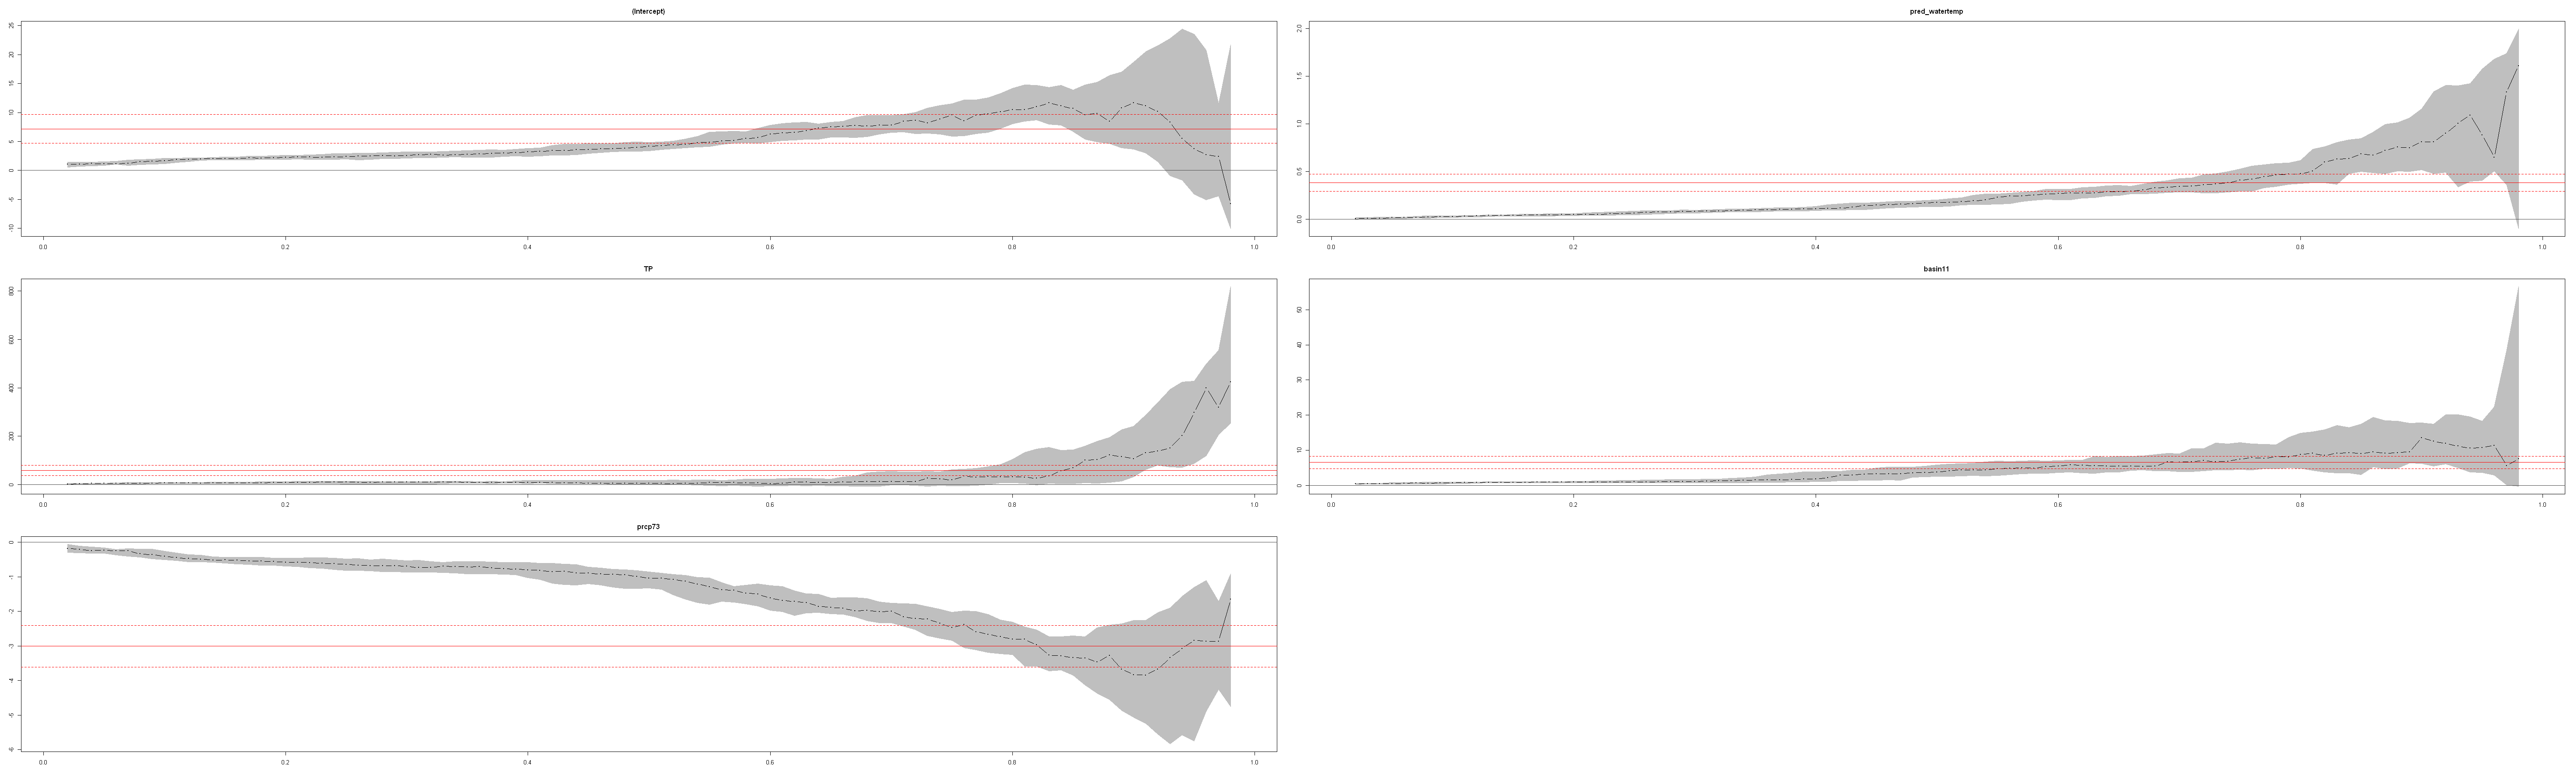

In [58]:
eq = 'CA ~ pred_watertemp + TP + basin1 + prcp73'
t = seq(0.02, 0.98, by=0.01)
mdl <- rq(eq, tau = t, alpha = 0.005, data = vmm)
plot(summary(mdl))

In [59]:
setEPS()
postscript("modelcoeff_oct18.eps")
plot(summary(mdl))
dev.off()

png 
  2

In [60]:

setEPS()
postscript("Fig3_Nov12.eps")
grid.arrange(plt1, plt2, plt3, plt4, nrow = 2)
dev.off()

png 
  2

In [61]:
a = 0.95
eq= "CA ~ pred_watertemp + TP + basin1 + prcp73"
mdl <-lm(eq,data=vmm)
confint(mdl, level = a)
summary(mdl)

,2.5 %,97.5 %
(Intercept),4.1944758,10.1278661
pred_watertemp,0.2735787,0.4896836
TP,32.8058540,84.0252061
basin11,4.4120792,8.6179638
prcp73,-3.7245001,-2.2927305



Call:
lm(formula = eq, data = vmm)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.684  -6.117  -2.181   2.516 105.649 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     7.16117    1.51161   4.737 2.51e-06 ***
pred_watertemp  0.38163    0.05506   6.932 7.93e-12 ***
TP             58.41553   13.04881   4.477 8.55e-06 ***
basin11         6.51502    1.07150   6.080 1.77e-09 ***
prcp73         -3.00862    0.36476  -8.248 5.68e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.88 on 899 degrees of freedom
  (51 observations deleted due to missingness)
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1988 
F-statistic: 57.02 on 4 and 899 DF,  p-value: < 2.2e-16


In [62]:
options(warn = oldw)